# Régression logistique - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données représente les chances de différents étudiants d'être admis à un programme universitaire en fonction de leurs résultats à deux examens

### Charger les données du fichier ex2data1.csv

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("ex2data1.csv")

In [4]:
b = np.array([data['exam1'], data['exam2']])

In [5]:
b.shape

(2, 100)

### Visualiser les données

Vous pouvez vous amuser à reproduire ce graphe avec les librairies Python, mais ne perdez pas trop de temps là-dessus non plus, il y a beaucoup à faire après!

<img src="figure-1.png">

### Découpez vos données en une matrice X et un vecteur y et transformerz-les en array numpy

In [6]:
X = np.array([np.ones(data.shape[0]), data['exam1'], data['exam2']])
y = np.array(data['admission'])

In [7]:
print(X.shape)
print(y.shape)

(3, 100)
(100,)


Vérifiez bien les dimensions de vos structures de données (X.shape)  
La matrice X doit-elle être de dimensions m x n ou bien m x (n+1) ? Quelle est la valeur de n?

### Initialisez theta en un vecteur de zéros

Combien de zéros vous faudra-t-il....?

In [8]:
theta = np.zeros(3)

In [9]:
theta.shape

(3,)

## Formulation de l'hypothèse

Revoyez l'équation de l'hypothèse de la régression logistique. Le produit de theta et de X est enveloppé dans une fonction g(z) qui correspond à la fonction sigmoïde. Nous allons commencer par coder cette fonction.

### Écrivez une fonction _sigmoid_ qui applique la sigmoïde à son argument et retourne le résultat. Si elle reçoit une matrice ou un vecteur en input, elle doit s'appliquer sur chaque élément individuellement et retourner une structure de mêmes dimensions

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:
sigmoid(np.dot(theta, X)).shape
#np.dot(theta.T, X.T).T.shape

(100,)

Vérifiez votre fonction. Quelle valeur renvoie une sigmoïde si z=0? Si z est grand? Si z est petit?  
Il est possible que vous ayez un lorsque la fonction exponentielle reçoit des valeurs trop grandes. Dans ce cas vous pourrez éventuellement remplacer votre fonction sigmoïde par celle de scipy pour éviter des problèmes dans le reste de votre implémentation.

### Écrivez une fonction _predict_, qui correspond à l'hypohèse hθ(x), qui prend en paramètres X et theta, les multiplie (attention à l'ordre!), applique la fonction sigmoide, et se débrouille pour que le résultat final soit un vecteur de 1 et 0 correspondant aux catégories

In [12]:
def predict(X, theta):
    return sigmoid(np.dot(theta, X))

In [13]:
predict(X, theta)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

## Entraînement du modèle

### Définissez la fonction de coût de votre modèle

In [14]:
def cost(X, y, theta):
    # m: scalar
    # y: (m x 1) matrix
    # theta: ((n + 1) x 1) matrix
    # X: (m x (n + 1)) matrix
    # predict: (m x 1) matrix
    # -1/m * (y * log(h(X, theta)) + (1 - y) * log(1 - h(X, theta)))
    pr = predict(X, theta)
    #print("pr: ")
    #print(pr)
    #print("1 - pr: ")
    #print(1 - pr)
    
    return -((np.dot(y, np.log(pr))) + (np.dot((1 - y), np.log(1 - pr)))) / y.shape[0]

### Appelez votre fonction _cost_. Vous devriez obtenir une valeur d'environ 0.693

In [15]:
cost(X, y, theta)

0.6931471805599453

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris, ainsi que l'évolution du coût

Noter que l'exercice original ne fait pas faire la descente du gradient pour entraîner le modèle, mais plutôt une fonction d'optimisation avancée (_fminunc_ en Matlab). Nous tenterons de faire quand même la descente du gradient. Les plus téméraires peuvent aussi trouver une fonction d'optimisation équivalente en Python et comparer les résultats.

In [16]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = y.shape[0]
    J_history = []
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        J_history.append(cost(X, y, theta))
        # theta: ((n + 1) x 1)
        # alpha: scalar
        # X: (m x (n + 1))
        # X.T: ((n + 1) x m)
        # y: (m x 1)
        # predict: (m x 1)
        #print(i)
        theta = theta - alpha * (np.dot(X, (predict(X, theta) - y)) / m)
        #print(theta)
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)

    return theta, J_history

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!!

Voyez entre vous quelles valeurs semblent correctes pour alpha et num_iters

In [27]:
new_th, jhist = fit(X, y, theta, 0.0011, 3500000)

In [30]:
#print(jhist)
print(new_th)

[-22.14911488   0.18215058   0.17709074]


### Appelez la fonction _cost_ avec le nouveau theta après entraînement

Vous devriez obtenir une valeur autour de 0.203

In [28]:
cost(X, y, new_th)

0.20500104000864938

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

In [19]:
import matplotlib.pyplot as plt

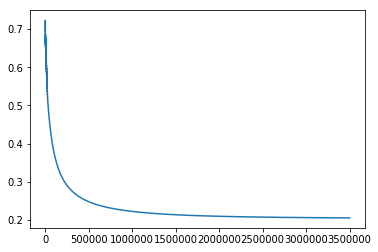

In [29]:
fig = plt.figure()
ax = plt.axes()
ax.plot(jhist)

## Évaluation de votre modèle

Nous allons évaluer la performance du modèle de deux façons:

### Évaluez la probabilité qu'un étudiant ayant obtenu 45 au premier examen, et 85 au deuxième, soit admis

Vous devriez avoir une probabilité d'admission de 0.776

In [31]:
predict(np.array([1, 45, 85]), new_th)

0.7503301293342245

### Évaluer l'exactitude (accuracy) des prédictions faites sur les données d'entraînement

Utilisez votre fonction _predict_ sur les données d'entraînement (X) et récupérez les prédictions dans un vecteur p

In [56]:
def zeroOrOne(p):
    m = p.shape[0]
    for i in range(m):
    #for j in range(n):
        #print(p[i])
        p[i] = 1 if p[i] > 0.5 else 0
    return p

In [58]:
p = zeroOrOne(predict(X, new_th))

Calculez le pourcentage des éléments de p qui correspondent à ceux de y. Ça vous donne le score d'exactitude

In [67]:
1. - (sum(abs(p - y)) / y.shape[0])

0.89

Vous devriez avoir un score d'environ 89.0 %

## BONUS: Visualisez la frontière de décision (decision boundary) sur le graphe

Pour ceux qui veulent découvrir Matplotlib, il faut ici afficher les données en deux nuages de points distincts (pour les deux classes) sur le même graphe, et aussi trouver une façon de tracer la fonction qui définit la frontière de décision. Amusez-vous bien, et surtout aidez-vous! Ça devrait donner un truc du genre:  


<img src="figure-2.png">

[-22.14911488   0.18215058   0.17709074]


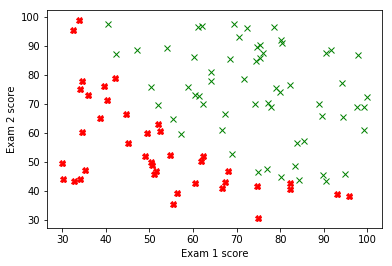

In [117]:
def getYs(X, y):
    m = y.shape[0]
    y01 = []
    y02 = []
    y11 = []
    y12 = []
    for i in range(m):
        if y[i] == 0:
            y01.append(X[1][i])
            y02.append(X[2][i])
        else:
            y11.append(X[1][i])
            y12.append(X[2][i])
    return y01, y02, y11, y12
ax = plt.axes()
y01, y02, y11, y12 = getYs(X, y)
ax.plot(y11, y12, 'gx')
ax.plot(y01, y02, 'rX')
# ax.plot(new_th)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
print(new_th)
# plt.plot(np.linspace(0, 100), np.linspace(0, 100), 'k-')


